# Hands-on Image Processing with Python

## Chapter 12: Some Additional Problems in Image Processing
**Author: Sandipan Dey**

### Seam carving

(821, 616, 3)


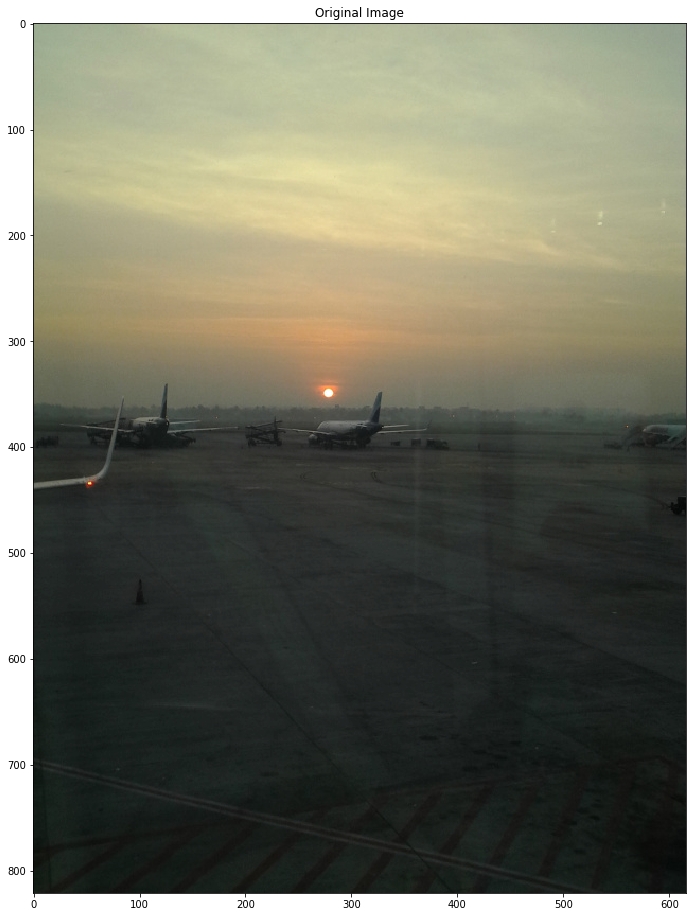

In [2]:
%matplotlib inline 

from skimage import data, draw
from skimage import transform, util
import numpy as np
from skimage import filters, color
from matplotlib import pyplot as plt
from skimage.io import imread
from skimage.color import rgb2gray


hl_color = np.array([0, 1, 0])

img = imread('../images/aero.jpg')
print(img.shape)
img = util.img_as_float(img)
eimg = filters.sobel(color.rgb2gray(img))

plt.figure(figsize=(20,16))
plt.title('Original Image')
plt.imshow(img)

(821, 416, 3)


/usr/local/lib/python3.5/dist-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


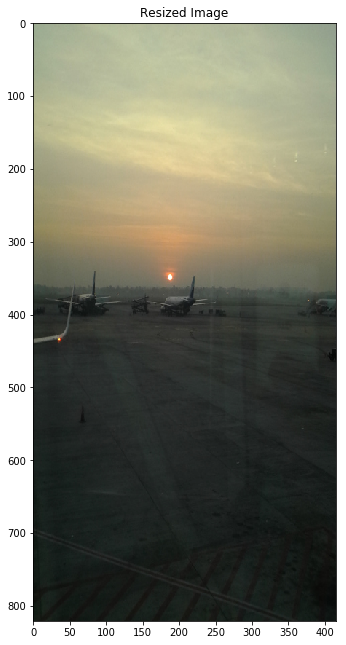

In [3]:
resized = transform.resize(img, (img.shape[0], img.shape[1] - 200), mode='reflect')
print(resized.shape)
plt.figure(figsize=(20,11))
plt.title('Resized Image')
plt.imshow(resized)

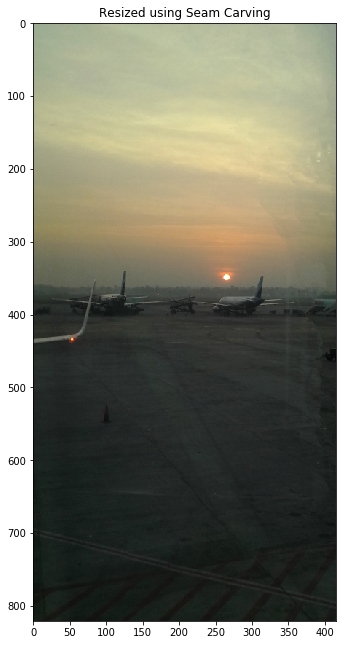

In [4]:
img = util.img_as_float(img)
eimg = filters.sobel(color.rgb2gray(img))
out = transform.seam_carve(img, eimg, 'vertical', 200)
plt.figure(figsize=(20,11))
plt.title('Resized using Seam Carving')
plt.imshow(out)

### Object Removal

(720, 534, 3)


(<matplotlib.axes._subplots.AxesSubplot at 0x7f6518575198>,
 <matplotlib.text.Text at 0x7f6519d5d3c8>)

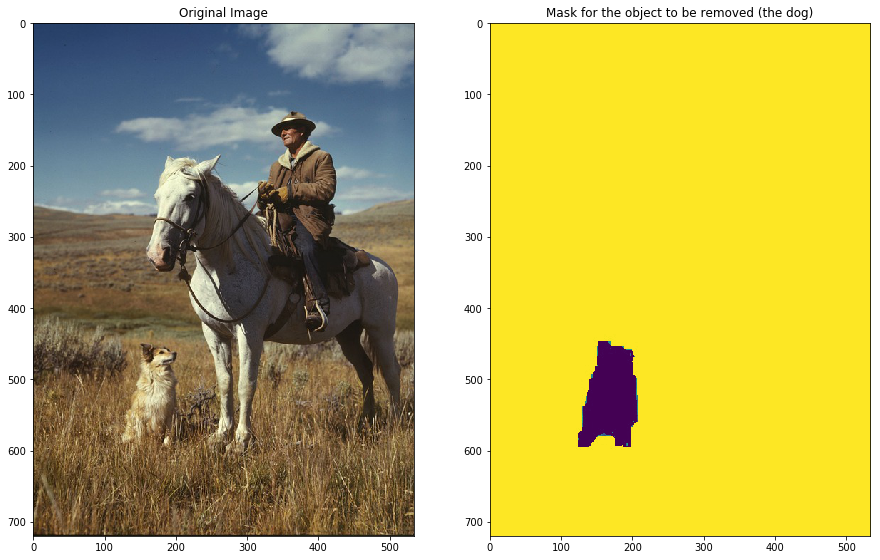

In [5]:
#from skimage import img_as_float
img = imread('../images/man.jpg')
mask_img = rgb2gray(imread('../images/man_mask.jpg'))
print(img.shape)
plt.figure(figsize=(15,10))
plt.subplot(121), plt.imshow(img), plt.title('Original Image')
plt.subplot(122), plt.imshow(mask_img), plt.title('Mask for the object to be removed (the dog)')#, plt.colorbar()

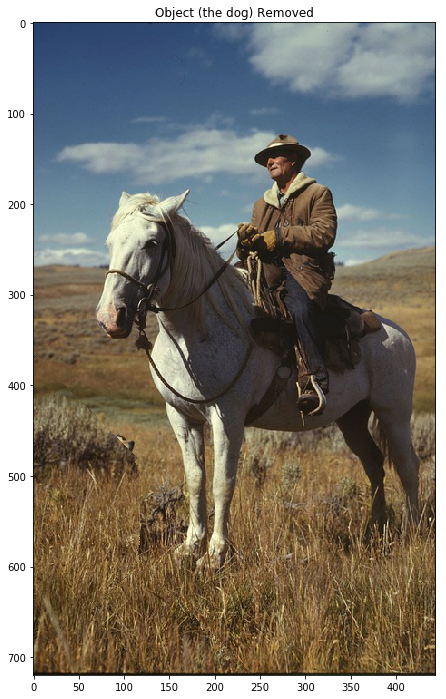

In [6]:
plt.figure(figsize=(10,12))
plt.title('Object (the dog) Removed')
out = transform.seam_carve(img, mask_img, 'vertical', 90)
resized = transform.resize(img, out.shape, mode='reflect')
plt.imshow(out)
plt.show()

### Seamless Cloning

In [7]:
# Standard imports
import cv2
import numpy as np 
 
# Read images
src = cv2.imread("../images/bird.jpg")
dst = cv2.imread("../images/sea.jpg")

# Create a rough mask around the airplane.
src_mask = cv2.imread("../images/bird_mask.jpg") 
print(src.shape, dst.shape, src_mask.shape)


# This is where the CENTER of the airplane will be placed
center = (450,150)
 
# Clone seamlessly.
output = cv2.seamlessClone(src, dst, src_mask, center, cv2.NORMAL_CLONE) #MIXED_CLONE) #NORMAL_CLONE)
 
# Save result
cv2.imwrite("../images/sea_bird.jpg", output);

(501, 1401, 3) (576, 768, 3) (480, 698, 3)


### Inpainting

[0. 1.]


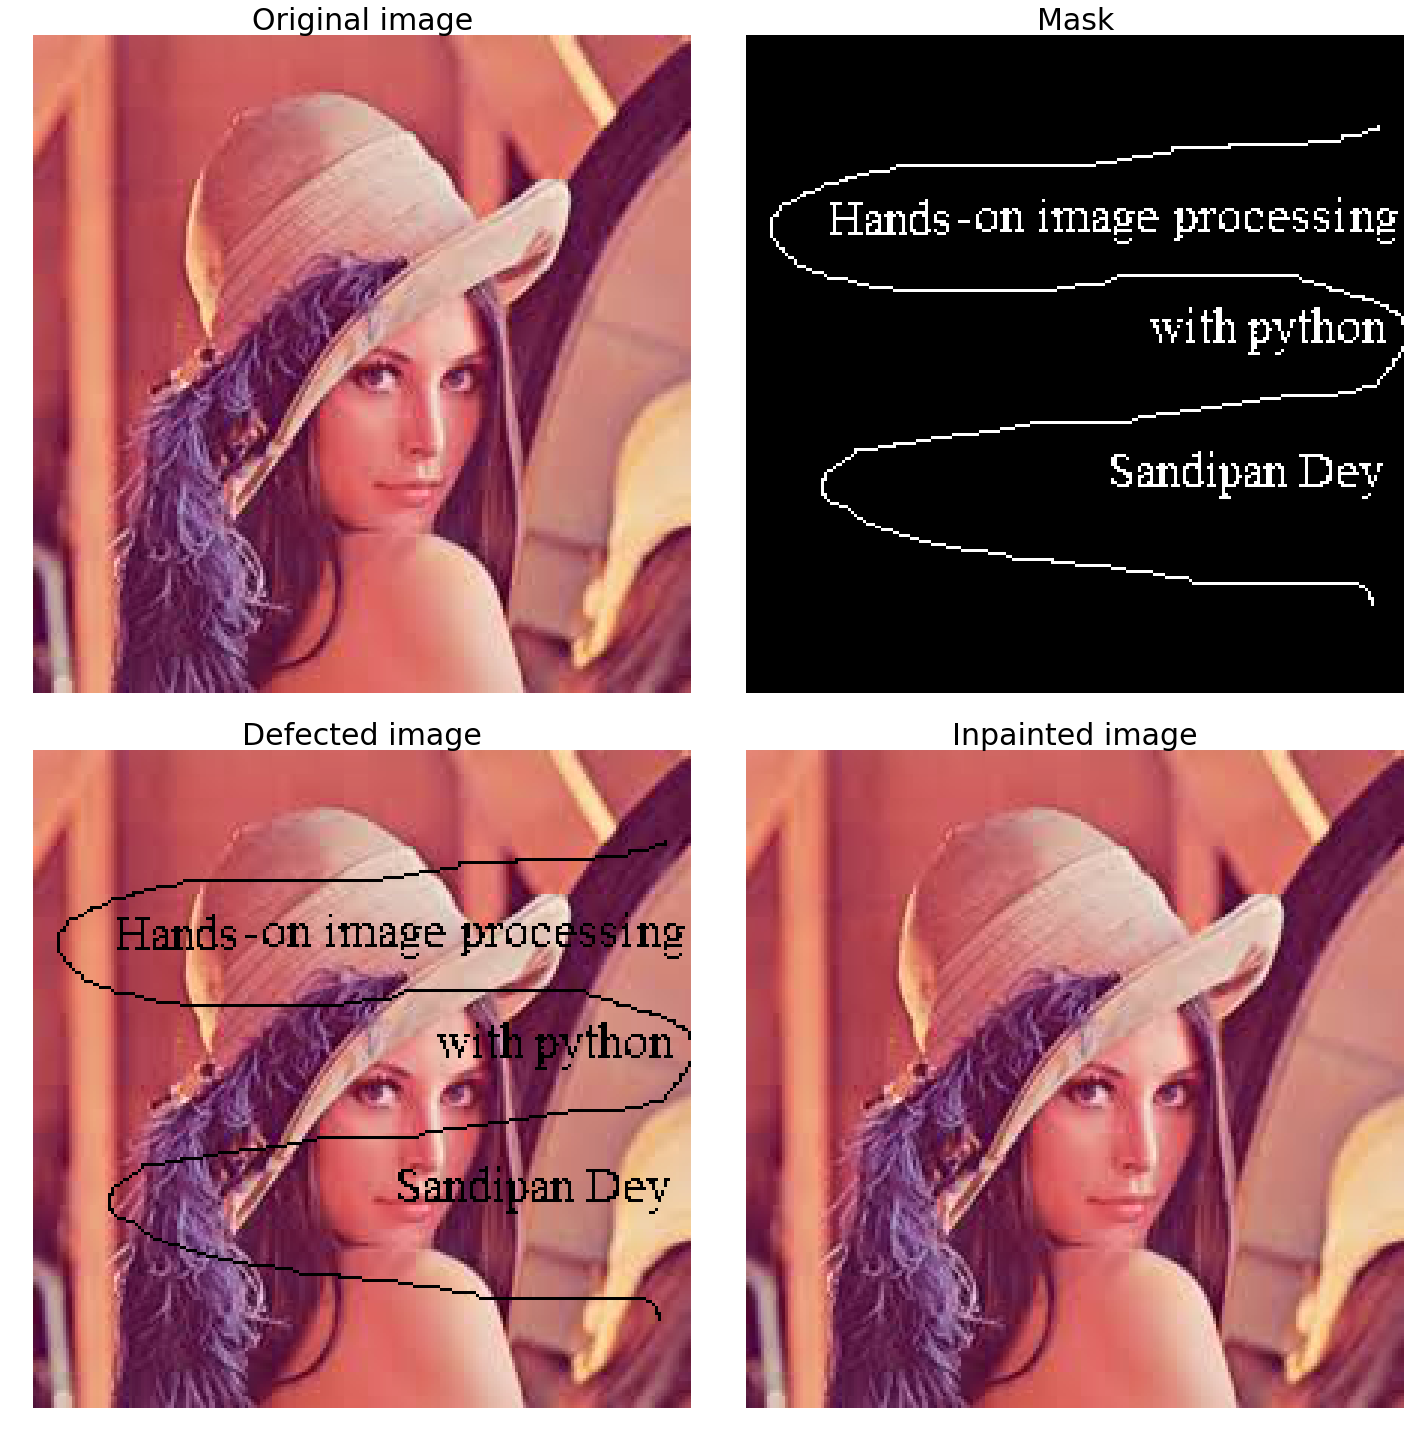

In [8]:
import numpy as np
import matplotlib.pyplot as plt

from skimage.io import imread
from skimage import img_as_float
from skimage.restoration import inpaint

image_orig = img_as_float(imread('../images/lena.jpg'))

# Create mask from a mask image
mask = rgb2gray(imread('../images/lena_scratch_mask.jpg'))
mask[mask > 0.5] = 1
mask[mask <= 0.5] = 0
print(np.unique(mask))

# Defect image over the same region in each color channel
image_defect = image_orig.copy()
for layer in range(image_defect.shape[-1]):
    image_defect[np.where(mask)] = 0

image_result = inpaint.inpaint_biharmonic(image_defect, mask, multichannel=True)

fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(20,20))
ax = axes.ravel()

ax[0].set_title('Original image', size=30)
ax[0].imshow(image_orig)

ax[1].set_title('Mask', size=30)
ax[1].imshow(mask, cmap=plt.cm.gray)

ax[2].set_title('Defected image', size=30)
ax[2].imshow(image_defect)

ax[3].set_title('Inpainted image', size=30)
ax[3].imshow(image_result)

for a in ax:
    a.axis('off')

fig.tight_layout()
plt.show()

In [9]:
from skimage.measure import compare_psnr
compare_psnr(image_orig, image_result)

44.072545552645

### Variational Denoising

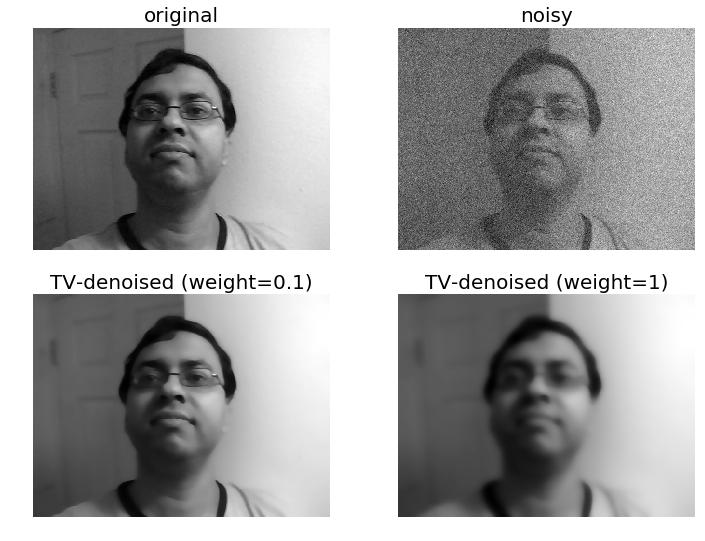

In [10]:
from skimage import io, color, data, img_as_float
from skimage.restoration import denoise_tv_chambolle
import matplotlib.pylab as plt
import numpy as np
img = color.rgb2gray(io.imread('../images/me12.jpg'))
plt.figure(figsize=(12,9))
plt.gray()
noisy_img = img + 0.5 * img.std() * np.random.randn(*img.shape)
plt.subplot(221), plt.imshow(img), plt.axis('off'), plt.title('original', size=20)
plt.subplot(222), plt.imshow(noisy_img), plt.axis('off'), plt.title('noisy', size=20)
denoised_img = denoise_tv_chambolle(img, weight=0.1) #, multichannel=True)
plt.subplot(223), plt.imshow(denoised_img), plt.axis('off'), plt.title('TV-denoised (weight=0.1)', size=20)
denoised_img = denoise_tv_chambolle(img, weight=1) #, multichannel=True)
plt.subplot(224), plt.imshow(denoised_img), plt.axis('off'), plt.title('TV-denoised (weight=1)', size=20)
plt.show()

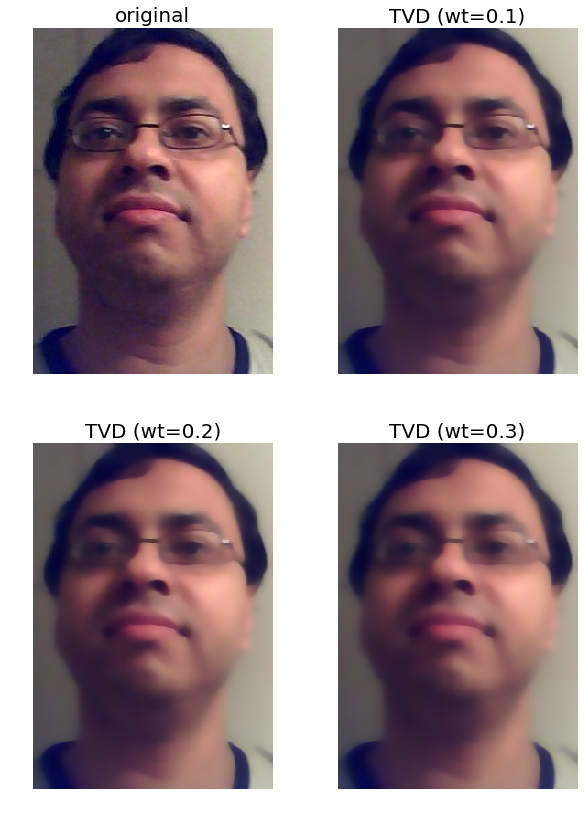

In [11]:
img = io.imread('../images/me18.jpg')
plt.figure(figsize=(10,14))
plt.subplot(221), plt.imshow(img), plt.axis('off'), plt.title('original', size=20)
denoised_img = denoise_tv_chambolle(img, weight=0.1, multichannel=True)
plt.subplot(222), plt.imshow(denoised_img), plt.axis('off'), plt.title('TVD (wt=0.1)', size=20)
denoised_img = denoise_tv_chambolle(img, weight=0.2, multichannel=True)
plt.subplot(223), plt.imshow(denoised_img), plt.axis('off'), plt.title('TVD (wt=0.2)', size=20)
denoised_img = denoise_tv_chambolle(img, weight=0.3, multichannel=True)
plt.subplot(224), plt.imshow(denoised_img), plt.axis('off'), plt.title('TVD (wt=0.3)', size=20)
plt.show()